# Flight Ticket Price Prediction
    1. EDA
    2. Model Fit
    3. Prediction
    4. Evaluation 
    

## EDA:

    a) Does price vary with Airlines?
    b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
    c) Does ticket price change based on the departure time and arrival time?
    d) How the price changes with change in Source and Destination?
    e) How does the ticket price vary between Economy and Business class?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
flight_data = pd.read_csv('flight_price-data.csv')
flight_data.head(1)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [4]:
flight_data.drop('Unnamed: 0', axis=1, inplace=True)
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
flight_data.shape

(300153, 11)

In [6]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
flight_data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
flight_data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:

#Get the categories
cate_cols = [each for each in flight_data.columns if flight_data[each].dtype == 'object']
cate_cols

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [10]:
#Gets each category values and their counts
for cols in cate_cols:
    print(cols, '--->', flight_data[cols].unique(), 
          '--->', flight_data[cols].nunique())
    print()

airline ---> ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'] ---> 6

flight ---> ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'] ---> 1561

source_city ---> ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] ---> 6

departure_time ---> ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] ---> 6

stops ---> ['zero' 'one' 'two_or_more'] ---> 3

arrival_time ---> ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'] ---> 6

destination_city ---> ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'] ---> 6

class ---> ['Economy' 'Business'] ---> 2



In [12]:
#New df for categories
categorical_df = flight_data[cate_cols]

In [24]:
'''
To plot the countplot and boxplot 
X colom vs price 
'''
def plotColVsPrice(col_name, df):
    plt.figure(figsize=(15,8))
    sns.countplot(x=col_name, data=df)
    plt.show()
    plt.figure(figsize=(15,8))
    sns.boxplot(x=col_name,y='price',data=df.sort_values('price',ascending=False))
    plt.show()

### Airline vs Price

In [25]:
flight_data.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

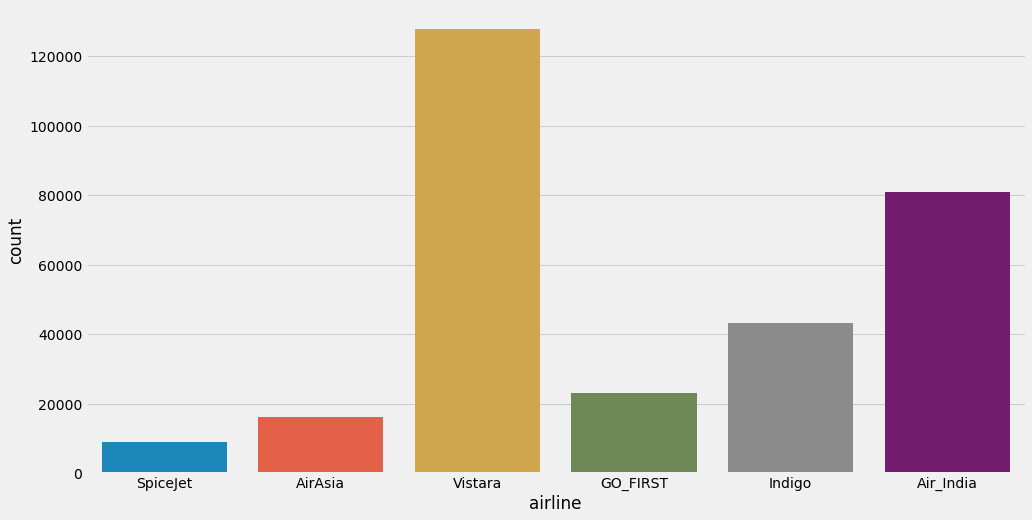

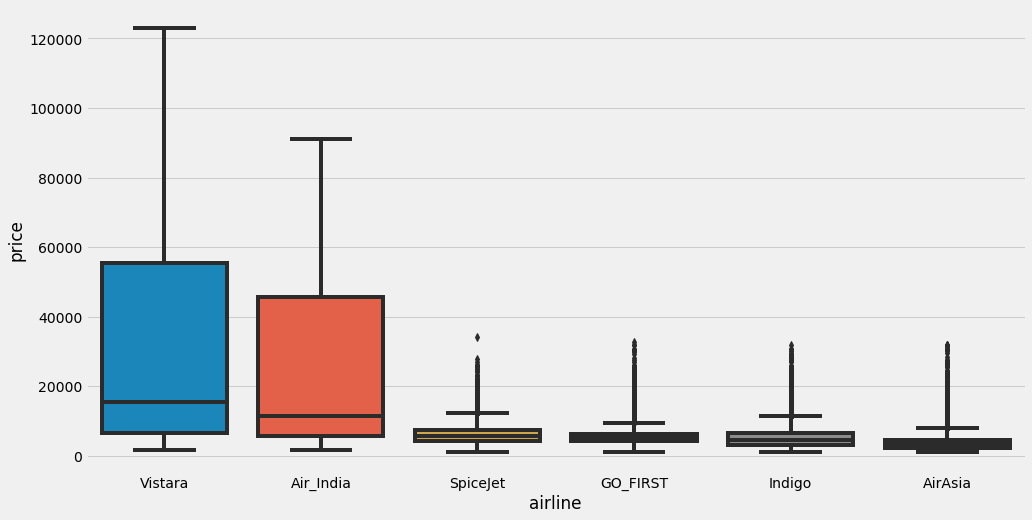

In [26]:
plotColVsPrice('airline', flight_data)

### Source city vs price 

In [28]:
flight_data.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

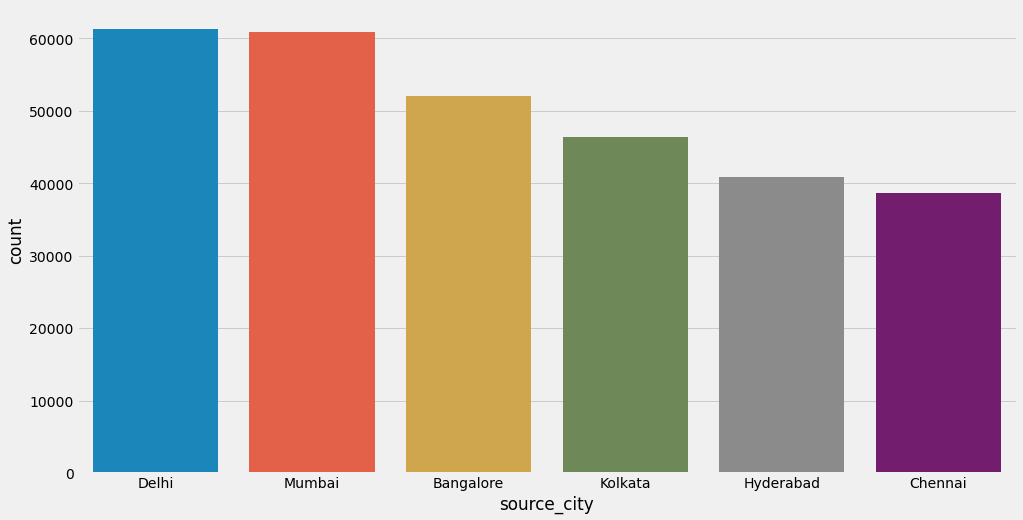

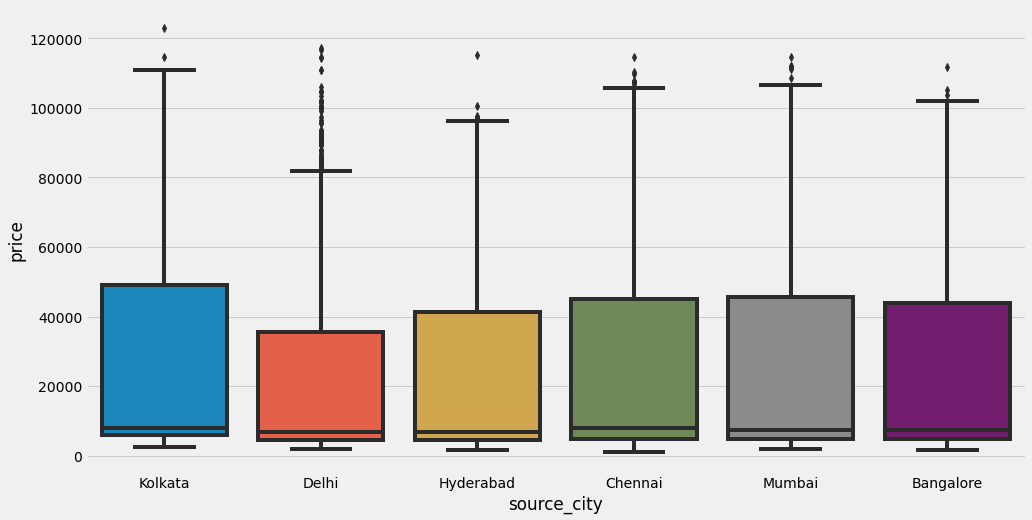

In [29]:
plotColVsPrice('source_city', flight_data)

### Departure time vs Price 

In [34]:
flight_data.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

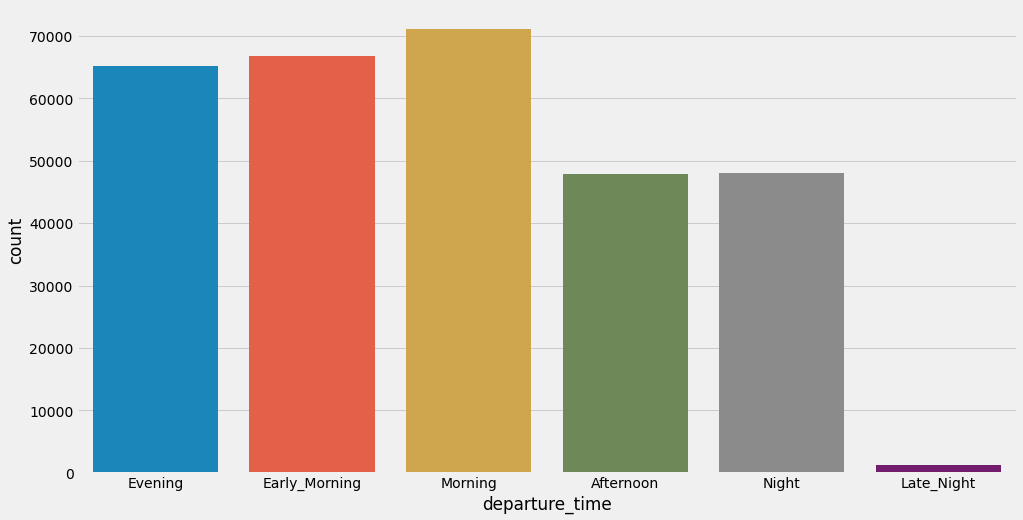

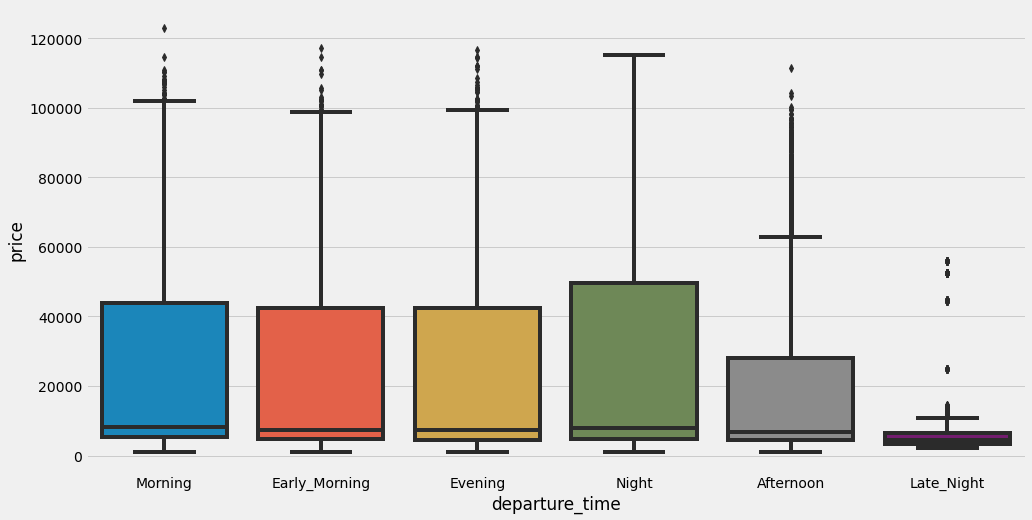

In [35]:
plotColVsPrice('departure_time', flight_data)

### Stop vs Price

In [36]:
flight_data.groupby('stops')['price'].mean()

stops
one            22900.992482
two_or_more    14113.450775
zero            9375.938535
Name: price, dtype: float64

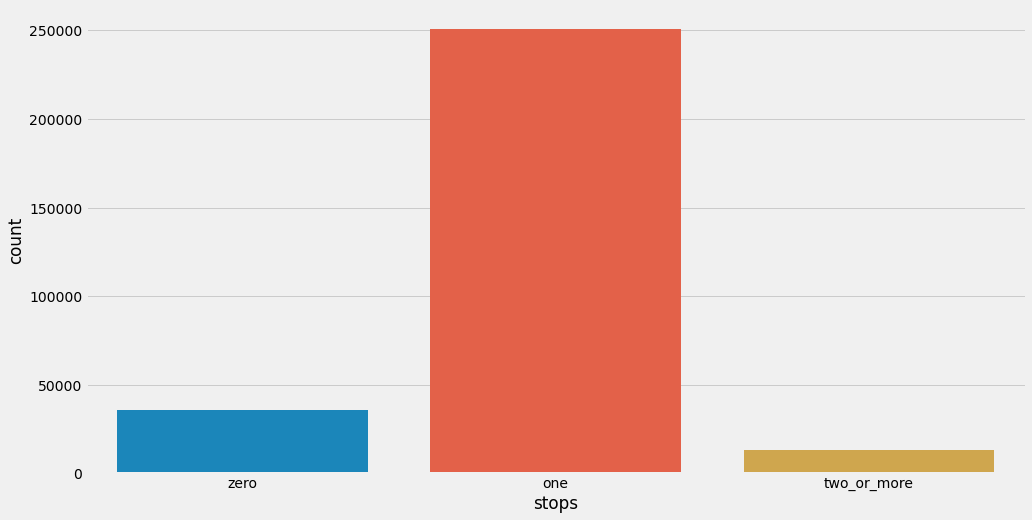

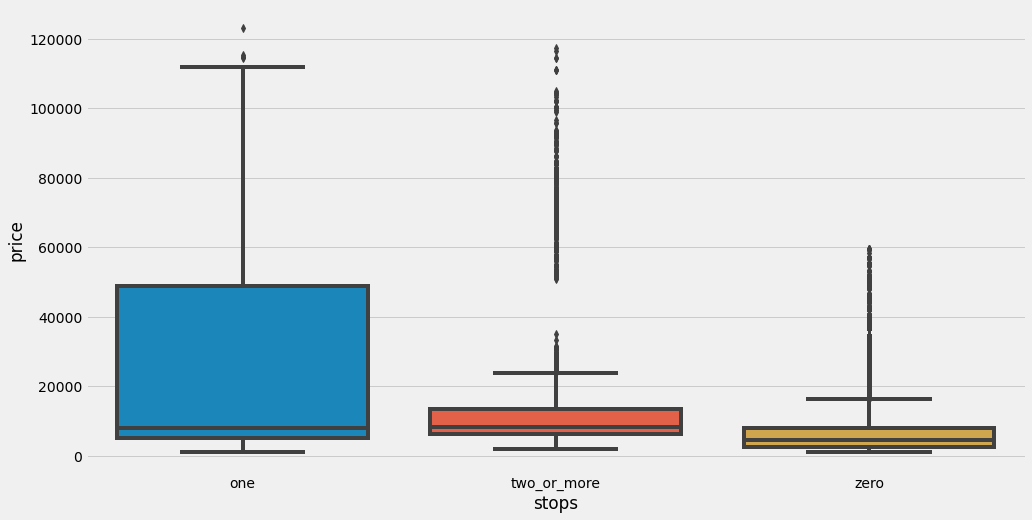

In [37]:
plotColVsPrice('stops', flight_data)

### Arrival time vs Price 

In [38]:
flight_data.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

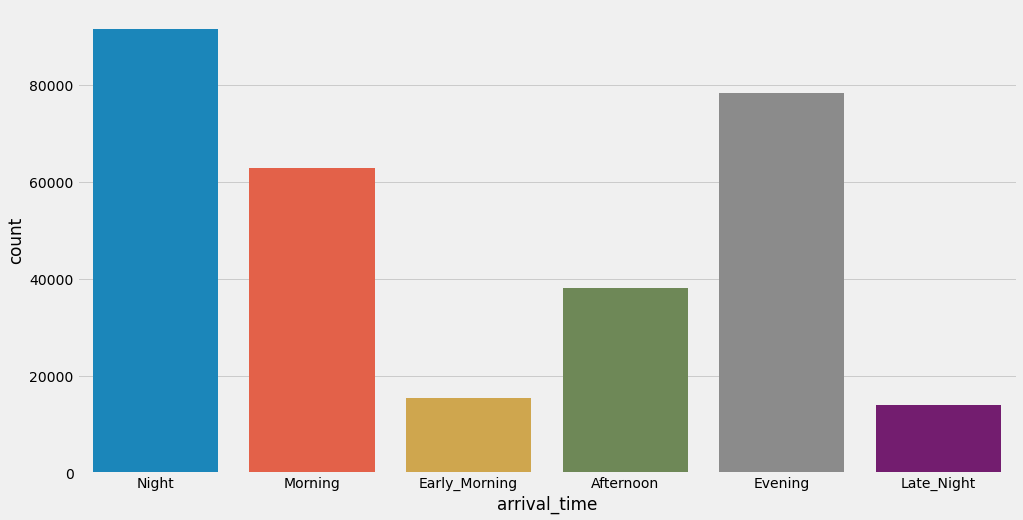

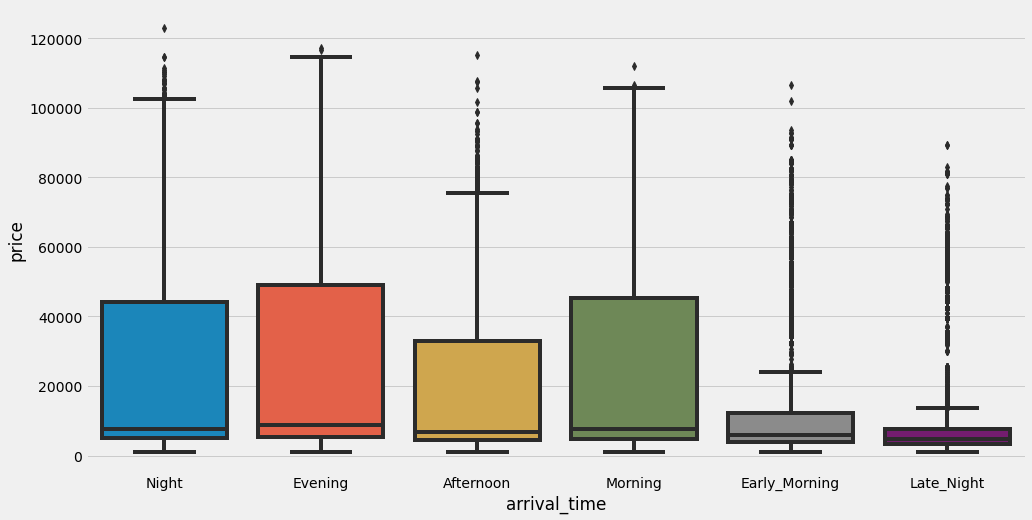

In [39]:
plotColVsPrice('arrival_time', flight_data)

### Destination vs Price 

In [40]:
flight_data.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

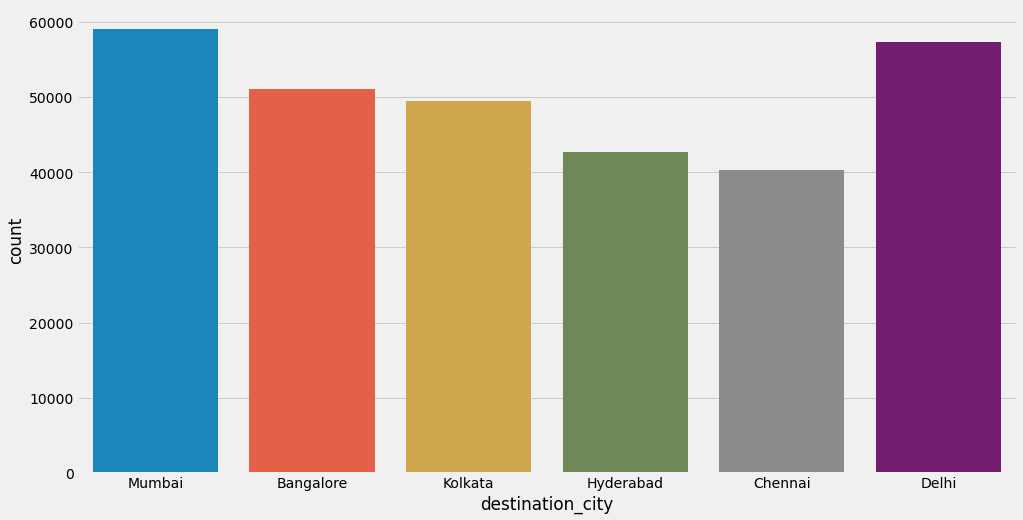

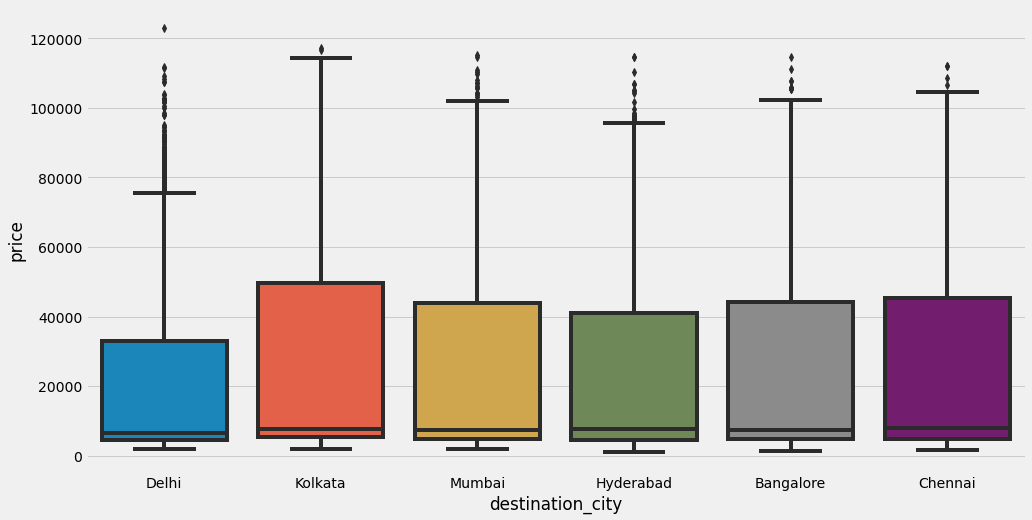

In [41]:
plotColVsPrice('destination_city', flight_data)

### Class Vs Price 

In [42]:
flight_data.groupby('class')['price'].mean()

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

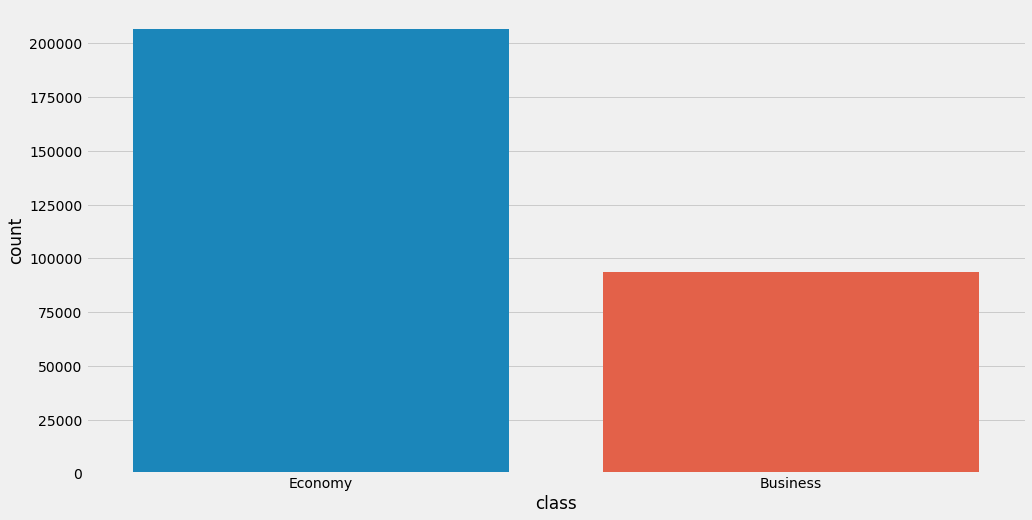

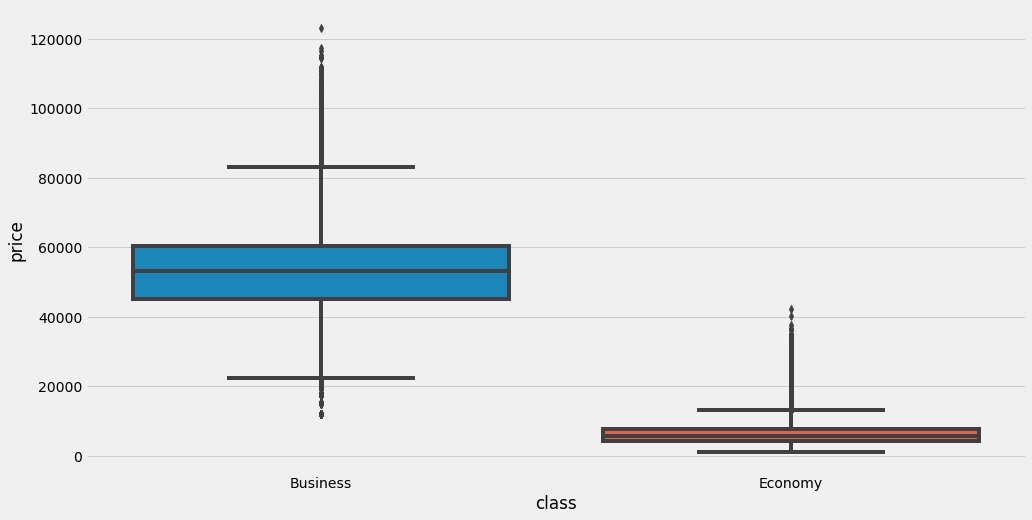

In [43]:
plotColVsPrice('class', flight_data)

### Duration



In [44]:
flight_data[flight_data['duration'] == flight_data['duration'].max()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [45]:
flight_data[flight_data['duration'] == flight_data['duration'].min()].head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498


### Days Left



In [47]:
flight_data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [48]:
flight_data[flight_data['days_left'] == flight_data['days_left'].max()].head()[['days_left', 'price']]


,days_left,price
9782,49,2476
9783,49,2476
9784,49,2476
9785,49,2700
9786,49,2700


In [49]:
flight_data[flight_data['days_left'] == flight_data['days_left'].min()].head()[['days_left', 'price']]


,days_left,price
0,1,5953
1,1,5953
2,1,5956
3,1,5955
4,1,5955


In [50]:
flight_data[flight_data['price'] == flight_data['price'].max()].head()[['days_left', 'price']]


,days_left,price
261377,3,123071


In [51]:
flight_data[flight_data['price'] == flight_data['price'].min()].head()[['days_left', 'price']]


,days_left,price
203807,16,1105
203808,16,1105
203908,17,1105
203909,17,1105
204003,18,1105


## Converting Categorical Features 





In [52]:
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [53]:
flight_data.drop('flight', axis=1, inplace=True)
flight_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [54]:
cate_cols.remove('flight')

In [55]:
cate_cols_model_data = pd.get_dummies(data=flight_data, columns=cate_cols, drop_first=True)

In [56]:
flight_model_data = pd.concat([flight_data, cate_cols_model_data], axis=1)

In [57]:
flight_model_data.drop(cate_cols, axis=1, inplace=True)

In [59]:
flight_model_data.head()

,duration,days_left,price,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,5953,2.17,1,5953,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,2.33,1,5953,2.33,1,5953,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,2.17,1,5956,2.17,1,5956,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2.25,1,5955,2.25,1,5955,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2.33,1,5955,2.33,1,5955,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


# Training a Linear Regression Model

## X and y arrays

In [60]:
X = flight_model_data.drop('price', axis=1)
y = flight_model_data['price']

## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Creating and Training the Model

In [63]:
from sklearn.linear_model import LinearRegression

In [65]:
lr_model = LinearRegression()

In [66]:
lr_model.fit(X_train, y_train)

LinearRegression()

## Predictions from our Model

In [73]:
price_prediction = lr_model.predict(X_test)

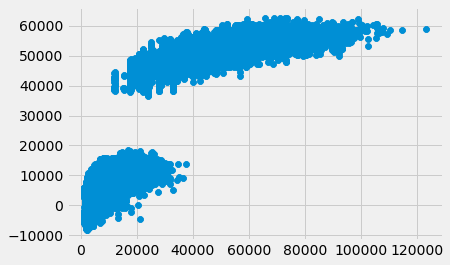

In [76]:
plt.scatter(x=y_test, y=price_prediction)
plt.show()

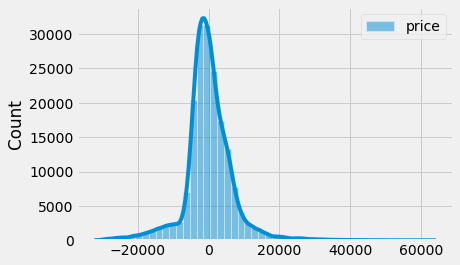

In [81]:
sns.histplot((y_test-price_prediction),bins=50, kde=True)
plt.show()

## Regression Evaluation Metrics

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
print('MAE:', mean_absolute_error(y_test, price_prediction))
print('MSE:', mean_squared_error(y_test, price_prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, price_prediction)))

MAE: 4554.287528318623
MSE: 45462093.39032357
RMSE: 6742.558371295244
